In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [5]:
file = 'data/bp_apps_clean.csv'
file_usp = 'data/us_pop.csv'

In [6]:
bp_data = pd.read_csv(file)

In [7]:
bp_df = pd.DataFrame(bp_data)

In [8]:
bp_df.head(24)

,SECTOR,October,November,December,January,February,March,April,May,June,July,August,September,Yearly Total,Fiscal Year
0,Livermore,716,523,514,527,525,588,496,529,449,395,517,426,6205,2000
1,Miami,401,342,493,375,562,614,461,613,483,639,543,711,6237,2000
2,New Orleans,559,626,333,596,684,1000,581,507,375,262,392,563,6478,2000
3,Ramey,221,102,115,142,28,71,63,202,124,99,284,280,1731,2000
4,Blaine,246,184,177,228,204,226,200,311,229,196,197,183,2581,2000
5,Buffalo,168,106,61,80,65,117,117,110,109,185,219,233,1570,2000
6,Detroit,213,145,191,190,183,227,169,146,138,165,130,160,2057,2000
7,Grand Forks,68,30,20,33,33,71,44,57,57,36,48,65,562,2000
8,Havre,73,82,80,122,78,100,190,246,129,120,178,170,1568,2000
9,Houlton,51,37,32,25,42,25,30,30,25,45,105,42,489,2000


In [9]:
bp_df = bp_df.rename(columns={
    
    'SECTOR': 'Border Location'
    
})

In [19]:
bd_location_df = pd.DataFrame(bp_df.groupby(['Border Location'])['Yearly Total'].sum())

In [20]:
bd_location_df.head(50)

,Yearly Total
Border Location,
Big Bend\n(formerly Marfa),131827
Blaine,16768
Buffalo,23640
Coastal Border,170090
Del Rio,760772
Detroit,23895
El Centro,1101756
El Paso,1002721
Grand Forks,12537


In [29]:
total_apps = bd_location_df.sum(axis=0)
print(total_apps)

Yearly Total    27127914
dtype: int64


In [30]:
bp_apps_avg = total_apps / 17
print(bp_apps_avg)

Yearly Total    1.595760e+06
dtype: float64


In [76]:
bp_yearly_df = pd.DataFrame(bp_df.groupby(['Fiscal Year'])['Yearly Total'].sum())

In [77]:
bp_yearly_df.head(18)

,Yearly Total
Fiscal Year,
2000,3352876
2001,2532428
2002,1910620
2003,1863114
2004,2320790
2005,2378150
2006,2178184
2007,1753408
2008,1447650


<Figure size 1152x720 with 0 Axes>

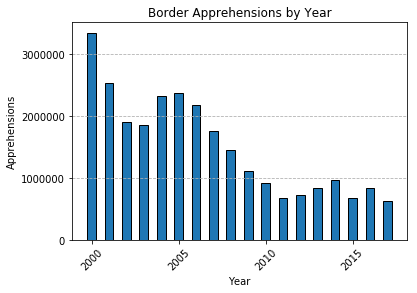

<Figure size 1152x720 with 0 Axes>

In [109]:
plt.bar(bp_yearly_df.index,
        height = bp_yearly_df['Yearly Total'],
                                  width = 0.5,
                          edgecolor = 'black',
       )
plt.title('Border Apprehensions by Year')
plt.xlabel('Year')
plt.xticks(rotation=45)
plt.ylabel('Apprehensions')
plt.grid(axis='y', ls='--')
plt.rcParams['font.size'] = 15
plt.figure(figsize=(16,10))